# HR Analytics Project- Understanding the Attrition in HR 

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

# HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

# Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

# Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
Hr_data= pd.read_csv('/Users/abhaysolanki/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv')
Hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
Hr_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Attrition is Label while others are Features.

In [5]:
Hr_data.shape

(1470, 35)

# Exploratory Data Analysis

In [6]:
Hr_data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

# In label column 'No' is  Far more in quantity than 'Yes' so it could lead to manipulate the Accuracy of model. 

In [7]:
Hr_data['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [8]:
Hr_data['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [9]:
Hr_data['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [10]:
Hr_data['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

# Checking for Nan Values

In [11]:
Nan=Hr_data.isnull().sum()
Nan

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

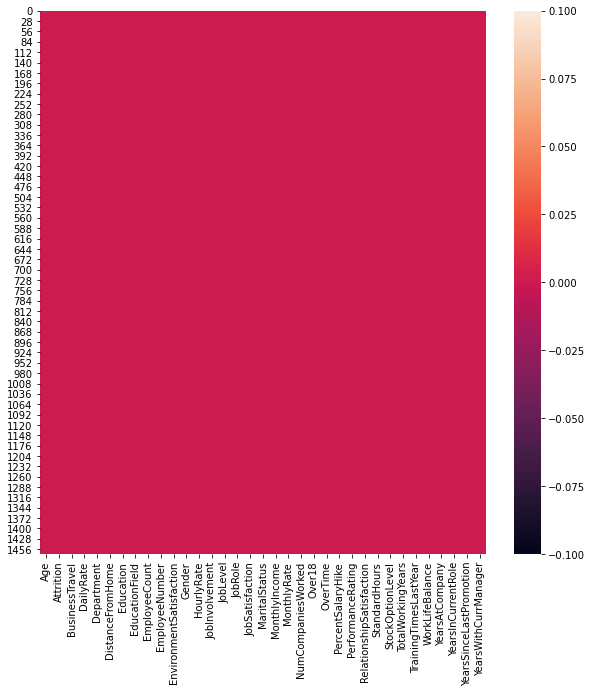

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(Hr_data.isnull())

In [13]:
Hr_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

<AxesSubplot:xlabel='EducationField', ylabel='count'>

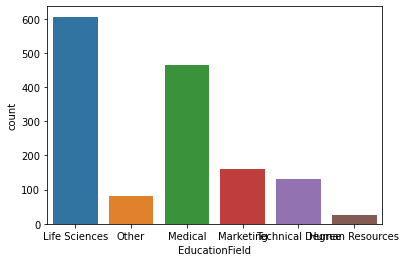

In [14]:
sns.countplot(x=Hr_data['EducationField'])

there are highest number of  employee in life Science, followed bt Medical 

<AxesSubplot:xlabel='Gender', ylabel='count'>

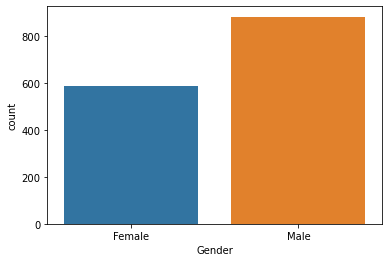

In [15]:
sns.countplot(x=Hr_data['Gender'])

As observed Males are little more dominent in field.

<AxesSubplot:xlabel='JobRole', ylabel='count'>

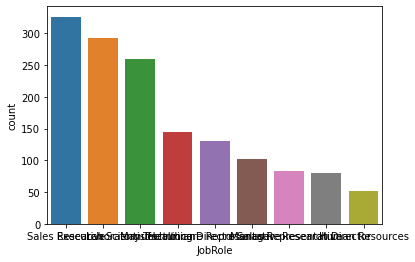

In [16]:
sns.countplot(x=Hr_data['JobRole'])

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

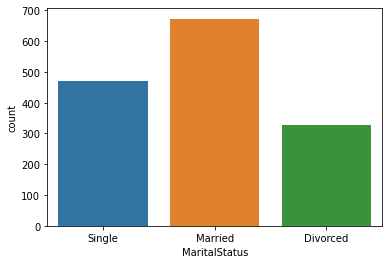

In [17]:
sns.countplot(x=Hr_data['MaritalStatus'])

There are more majority of married employees than single and divorced.

<AxesSubplot:xlabel='OverTime', ylabel='count'>

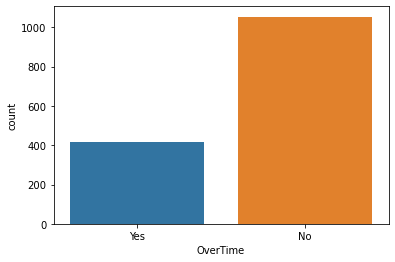

In [18]:
sns.countplot(x=Hr_data['OverTime'])

Employees  prefer to not work OverTime more.

# Employee number and Employee Count does not contribute for any analysis so these column can be dropped.

In [19]:
Hr_data.drop(['EmployeeNumber','EmployeeCount'], axis=1, inplace=True)

In [20]:
# differentiate the categorical and numerical Value
cal_col = Hr_data.select_dtypes(include=['object']).columns
num_col = Hr_data.select_dtypes(exclude=['object']).columns
print(cal_col)
print(num_col)


Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [21]:
pd.set_option('display.max_columns', None)
Hr_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


<AxesSubplot:xlabel='OverTime', ylabel='count'>

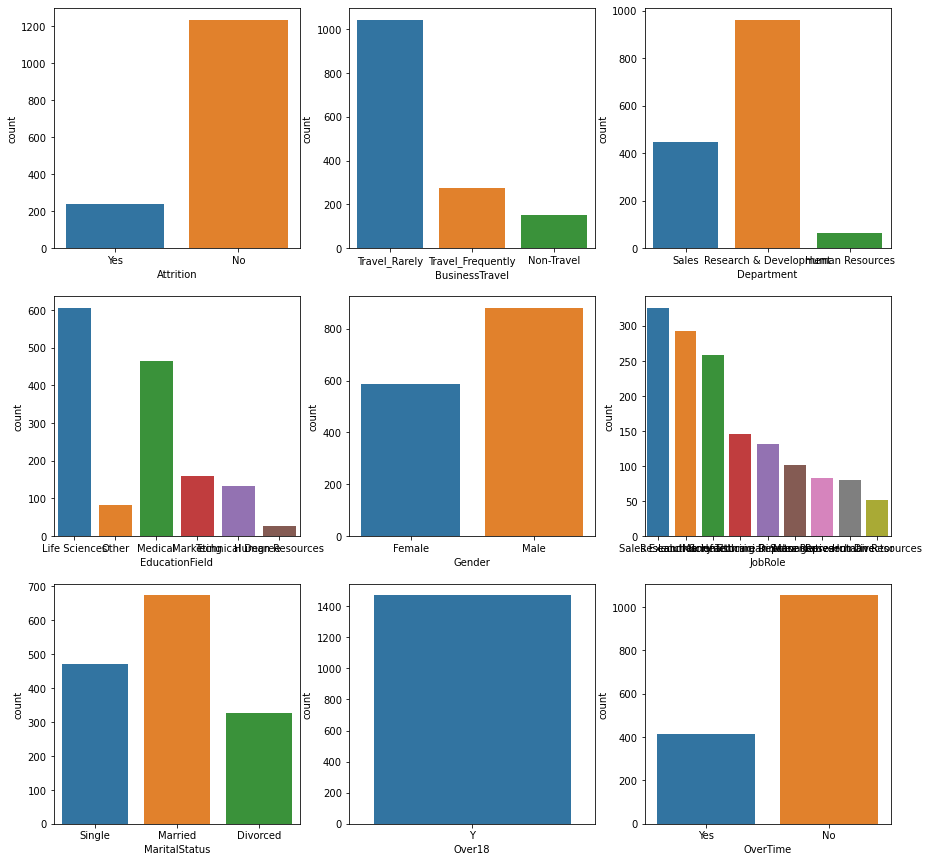

In [22]:
# visulaizing the categorical values
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.countplot(data=Hr_data, x='Attrition')
plt.subplot(3,3,2)
sns.countplot(data=Hr_data, x='BusinessTravel')
plt.subplot(3,3,3)
sns.countplot(data=Hr_data, x='Department')
plt.subplot(3,3,4)
sns.countplot(data=Hr_data,x='EducationField')
plt.subplot(3,3,5)
sns.countplot(data=Hr_data, x='Gender')
plt.subplot(3,3,6)
sns.countplot(data=Hr_data, x='JobRole')
plt.subplot(3,3,7)
sns.countplot(data=Hr_data,x='MaritalStatus')
plt.subplot(3,3,8)
sns.countplot(data=Hr_data,x='Over18')
plt.subplot(3,3,9)
sns.countplot(data=Hr_data, x='OverTime')

Insights :

~ We can see that there are very less people who leave organisation as compared to who dont.Clearly in this case we have a class imbalance problem.

~ Employees in company Travel rearly.

~ more than 800 people work in Research & Development.

~ Most people have the education field of life science.

~ All the Emplyees are over 18 Year old.

In [23]:
Hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# Checking for Discription

In [24]:
Hr_data.shape

(1470, 33)

In [25]:
Hr_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<AxesSubplot:>

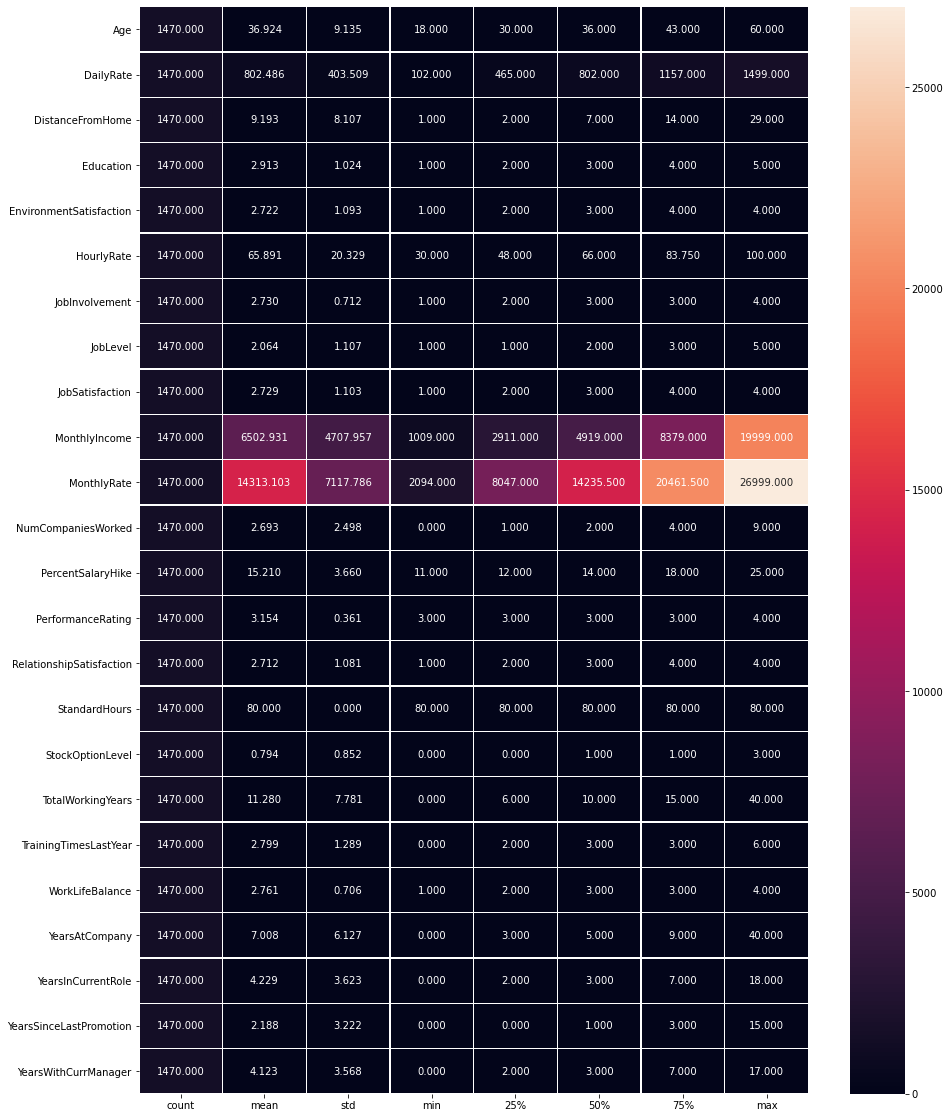

In [26]:
plt.figure(figsize=(15,20))
sns.heatmap(Hr_data.describe().transpose(),annot=True, fmt='0.3f', linecolor='white', linewidths=0.4 )

<AxesSubplot:xlabel='Attrition', ylabel='count'>

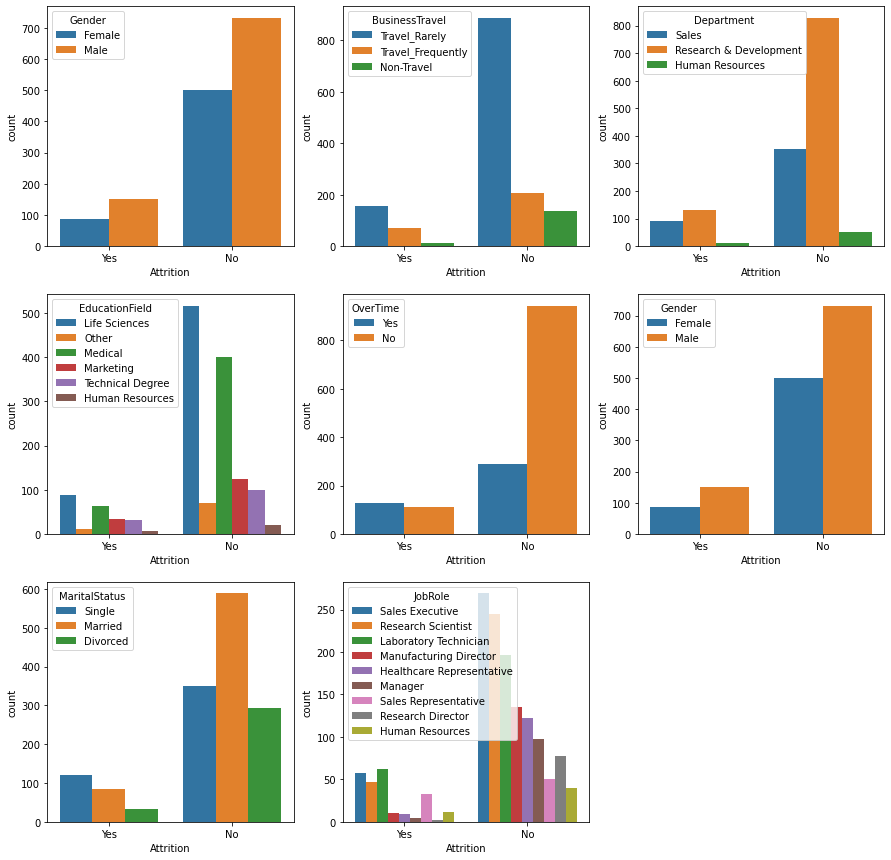

In [27]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.countplot(x=Hr_data['Attrition'], hue=Hr_data['Gender'])
plt.subplot(3,3,2)
sns.countplot(x=Hr_data['Attrition'], hue=Hr_data['BusinessTravel'])
plt.subplot(3,3,3)
sns.countplot(x=Hr_data['Attrition'], hue=Hr_data['Department'])
plt.subplot(3,3,4)
sns.countplot(x=Hr_data['Attrition'], hue=Hr_data['EducationField'])
plt.subplot(3,3,5)
sns.countplot(x=Hr_data['Attrition'], hue=Hr_data['OverTime'])
plt.subplot(3,3,6)
sns.countplot(x=Hr_data['Attrition'], hue=Hr_data['Gender'])
plt.subplot(3,3,7)
sns.countplot(x=Hr_data['Attrition'], hue=Hr_data['MaritalStatus'])
plt.subplot(3,3,8)
sns.countplot(x=Hr_data['Attrition'], hue=Hr_data['JobRole'])

<AxesSubplot:xlabel='Gender', ylabel='HourlyRate'>

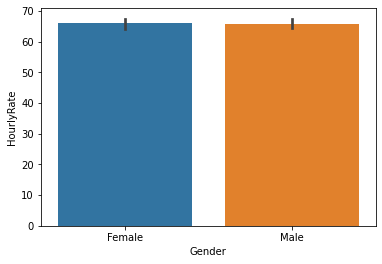

In [28]:
sns.barplot(x=Hr_data['Gender'], y=Hr_data['HourlyRate'])

Male and Females are paid Equaliiy.

<AxesSubplot:xlabel='Attrition', ylabel='NumCompaniesWorked'>

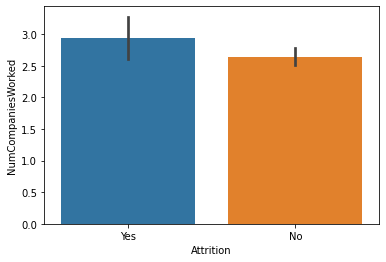

In [29]:
sns.barplot(x=Hr_data['Attrition'], y=Hr_data['NumCompaniesWorked'])

As the employee who work in more company have a little chances to leave than stay.

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='YearsAtCompany'>

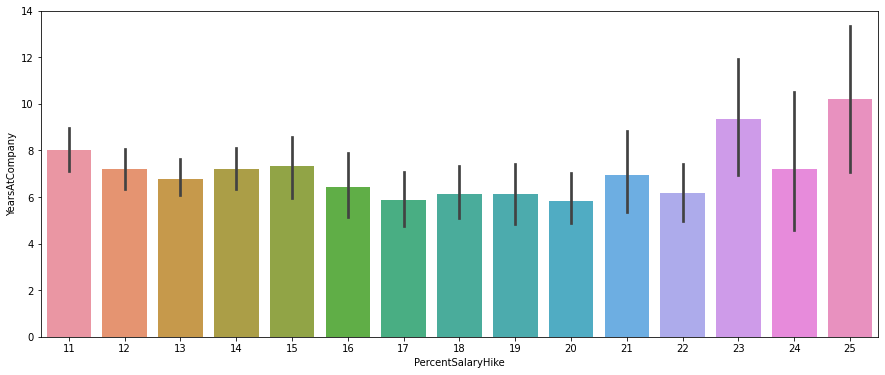

In [30]:
plt.figure(figsize=(15,6))
sns.barplot(x=Hr_data['PercentSalaryHike'], y=Hr_data['YearsAtCompany'])

the Data is showing some ambigous result. there is no direct relation showing between these Factor.

<AxesSubplot:xlabel='YearsAtCompany', ylabel='JobSatisfaction'>

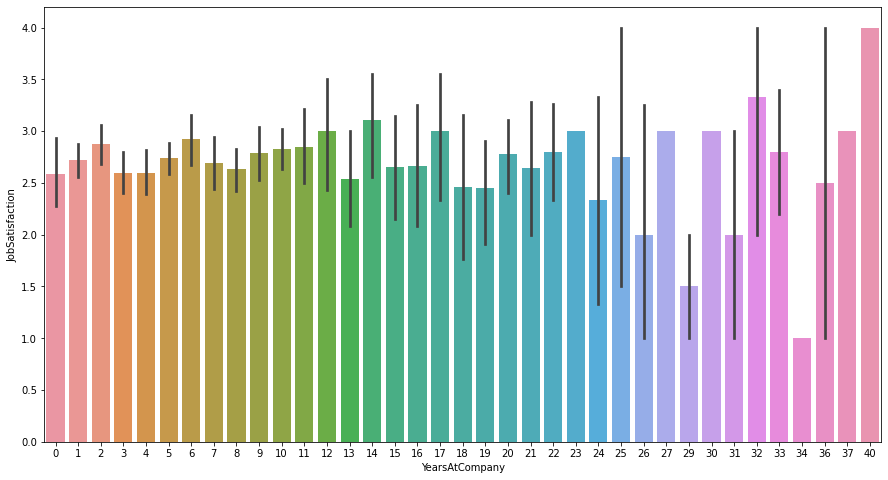

In [31]:
plt.figure(figsize=(15,8))
sns.barplot(x=Hr_data["YearsAtCompany"],y=Hr_data["JobSatisfaction"])

There is no direct relation between jobSatisfaction and YearAtCompany

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='JobLevel'>

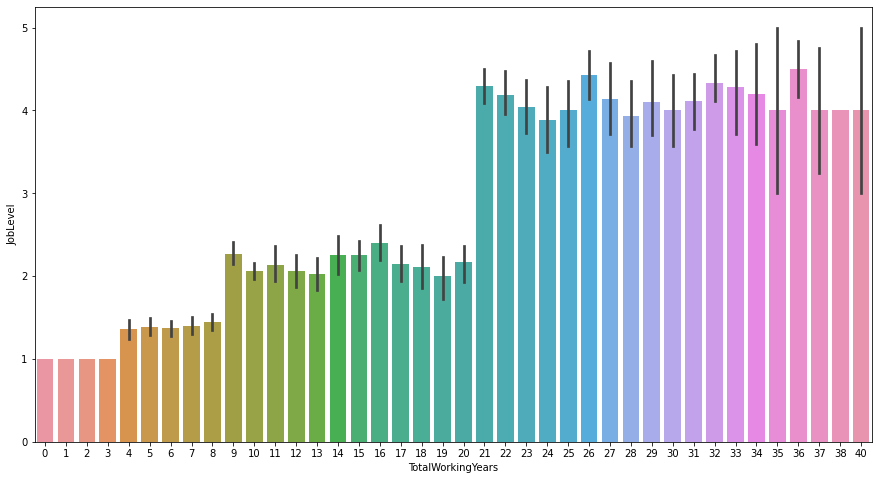

In [32]:
plt.figure(figsize=(15,8))
sns.barplot(x=Hr_data["TotalWorkingYears"],y=Hr_data["JobLevel"])

As evident, employees who been in company for long time have been promoted or Jobrole improved.

<AxesSubplot:xlabel='Age', ylabel='JobLevel'>

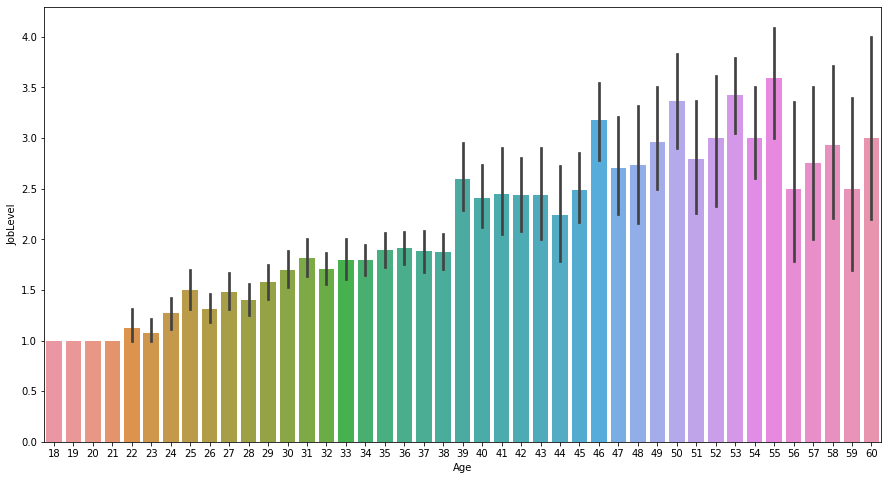

In [33]:
plt.figure(figsize=(15,8))
sns.barplot(x=Hr_data['Age'],y=Hr_data['JobLevel'])

As the emplyee is getting experienced their Joblevel improved

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='YearsWithCurrManager'>

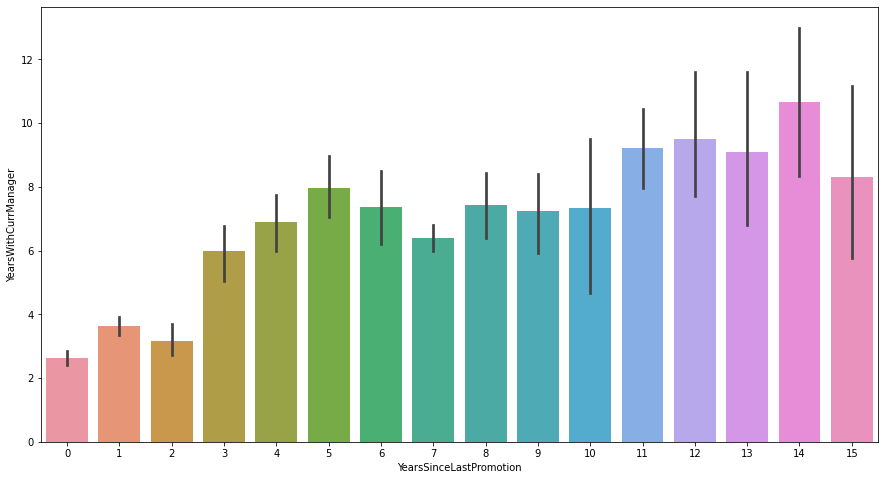

In [34]:
plt.figure(figsize=(15,8))
sns.barplot(x=Hr_data['YearsSinceLastPromotion'], y=Hr_data['YearsWithCurrManager'])

there is no direct correlation between YearsSinceLastPromotion and YearsWithCurrManager.

# As the most of the values are in Categorical so we will convert into numeric forms using the encoder.

In [35]:
from sklearn.preprocessing import OrdinalEncoder
Encode=OrdinalEncoder()

In [36]:
for i in Hr_data.columns:
    if Hr_data[i].dtypes=='object':
        Hr_data[i]= Encode.fit_transform(Hr_data[i].values.reshape(-1,1))

In [37]:
Hr_data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2,1.0,2,0.0,94,3,2,7.0,4,2.0,5993,19479,8,0.0,1.0,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0.0,1.0,279,1.0,8,1,1.0,3,1.0,61,2,2,6.0,2,1.0,5130,24907,1,0.0,0.0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1.0,2.0,1373,1.0,2,2,4.0,4,1.0,92,2,1,2.0,3,2.0,2090,2396,6,0.0,1.0,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,4,0.0,56,3,1,6.0,3,1.0,2909,23159,1,0.0,1.0,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0.0,2.0,591,1.0,2,1,3.0,1,1.0,40,3,1,2.0,2,1.0,3468,16632,9,0.0,0.0,12,3,4,80,1,6,3,3,2,2,2,2
5,32,0.0,1.0,1005,1.0,2,2,1.0,4,1.0,79,3,1,2.0,4,2.0,3068,11864,0,0.0,0.0,13,3,3,80,0,8,2,2,7,7,3,6
6,59,0.0,2.0,1324,1.0,3,3,3.0,3,0.0,81,4,1,2.0,1,1.0,2670,9964,4,0.0,1.0,20,4,1,80,3,12,3,2,1,0,0,0
7,30,0.0,2.0,1358,1.0,24,1,1.0,4,1.0,67,3,1,2.0,3,0.0,2693,13335,1,0.0,0.0,22,4,2,80,1,1,2,3,1,0,0,0
8,38,0.0,1.0,216,1.0,23,3,1.0,4,1.0,44,2,3,4.0,3,2.0,9526,8787,0,0.0,0.0,21,4,2,80,0,10,2,3,9,7,1,8
9,36,0.0,2.0,1299,1.0,27,3,3.0,3,1.0,94,3,2,0.0,3,1.0,5237,16577,6,0.0,0.0,13,3,2,80,2,17,3,2,7,7,7,7


# Checking for the correlation

In [38]:
Hr_data.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,0.024287,0.029820,0.509604,-0.122427,-0.004892,-0.095029,0.497855,0.028051,0.299635,NaN,0.028062,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,-0.006846,-0.130016,-0.169105,0.067151,-0.103481,0.162070,-0.159840,0.015170,0.043494,NaN,0.246118,-0.013478,0.002889,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,0.026528,0.039062,0.019311,0.002724,-0.033962,0.024001,0.034319,-0.014107,0.020875,NaN,0.016543,-0.029377,-0.026341,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,0.023381,0.046135,0.002966,-0.009472,0.030571,-0.069586,0.007707,-0.032182,0.038153,NaN,0.009135,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,-0.004144,-0.024586,0.101963,0.662431,0.021001,0.056073,0.053130,0.023642,-0.035882,NaN,0.007481,-0.007840,-0.024604,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,0.031131,0.008783,0.005303,-0.001015,-0.003669,-0.014437,-0.017014,0.027473,-0.029251,NaN,0.025514,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,0.016775,0.042438,0.101589,0.004236,-0.011296,0.004053,0.094961,-0.026084,0.126317,NaN,-0.020322,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,-0.021941,-0.002655,-0.044933,0.015599,-0.034401,0.014420,-0.041070,-0.027182,-0.008663,NaN,0.002259,-0.011214,-0.005614,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,-0.049857,-0.008278,0.001212,-0.017321,-0.006784,-0.003593,-0.006259,0.037600,0.012594,NaN,0.070132,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,-0.000478,0.017960,-0.039403,-0.039723,0.033252,-0.047183,-0.031858,-0.041482,-0.039147,NaN,-0.041924,0.002733,-0.013859,0.022868,NaN,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


<AxesSubplot:>

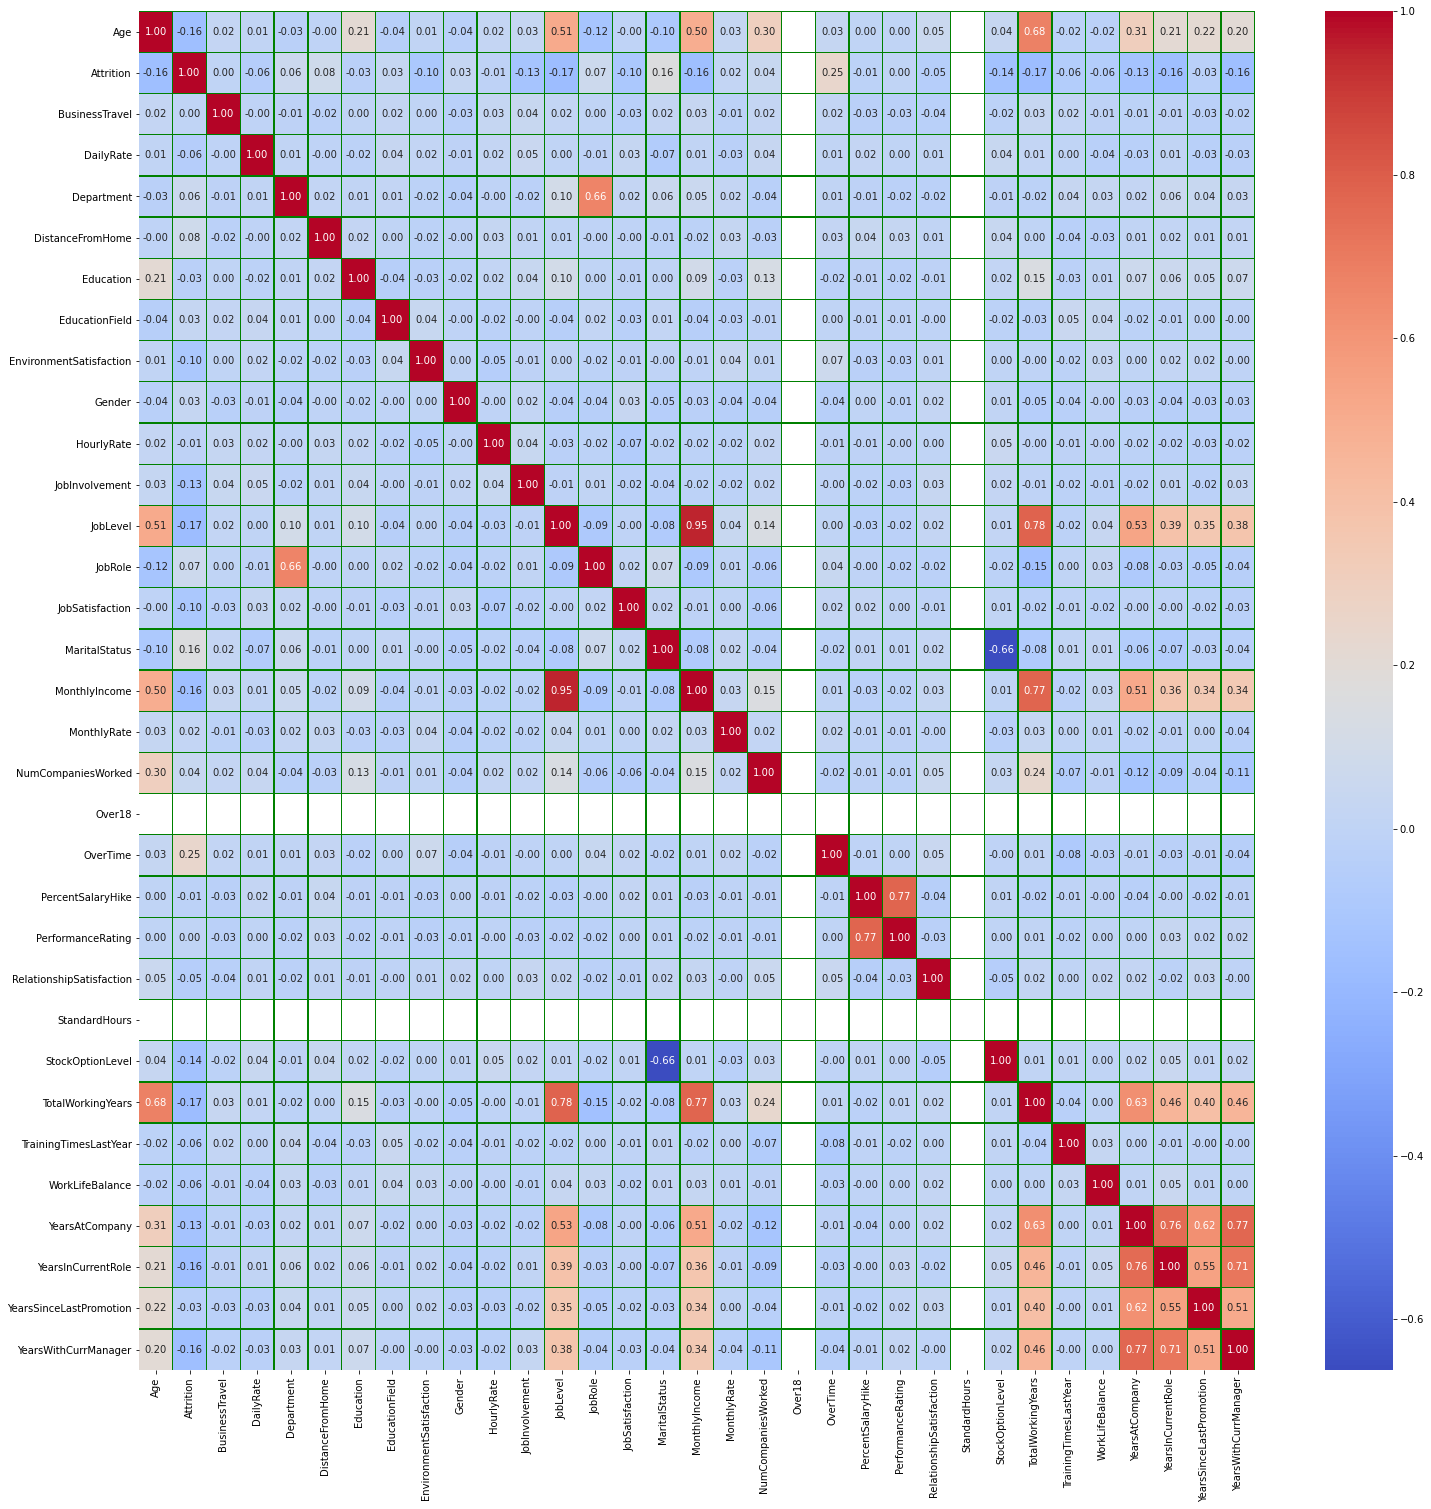

In [39]:
plt.figure(figsize=(25,25))
sns.heatmap(Hr_data.corr(),annot=True, fmt='0.2f', linecolor='green', linewidths=0.2, cmap='coolwarm')

Insights:-

~Percent Salary hike is very positively related with performance rating.

~Years at company and years with current manager has high positive relationship.

~overtime is also showing the highest correlation with attrition.

~over18 and standardhour have no correlation with any other factors.

~ yearatcompany is also showing some positive correlation with yearwithcurrmanager.

~job level and totalworkinghours are also highly correlated.

# Checking for outliers

Age                            AxesSubplot(0.125,0.772143;0.110714x0.107857)
Attrition                   AxesSubplot(0.257857,0.772143;0.110714x0.107857)
BusinessTravel              AxesSubplot(0.390714,0.772143;0.110714x0.107857)
DailyRate                   AxesSubplot(0.523571,0.772143;0.110714x0.107857)
Department                  AxesSubplot(0.656429,0.772143;0.110714x0.107857)
DistanceFromHome            AxesSubplot(0.789286,0.772143;0.110714x0.107857)
Education                      AxesSubplot(0.125,0.642714;0.110714x0.107857)
EducationField              AxesSubplot(0.257857,0.642714;0.110714x0.107857)
EnvironmentSatisfaction     AxesSubplot(0.390714,0.642714;0.110714x0.107857)
Gender                      AxesSubplot(0.523571,0.642714;0.110714x0.107857)
HourlyRate                  AxesSubplot(0.656429,0.642714;0.110714x0.107857)
JobInvolvement              AxesSubplot(0.789286,0.642714;0.110714x0.107857)
JobLevel                       AxesSubplot(0.125,0.513286;0.110714x0.107857)

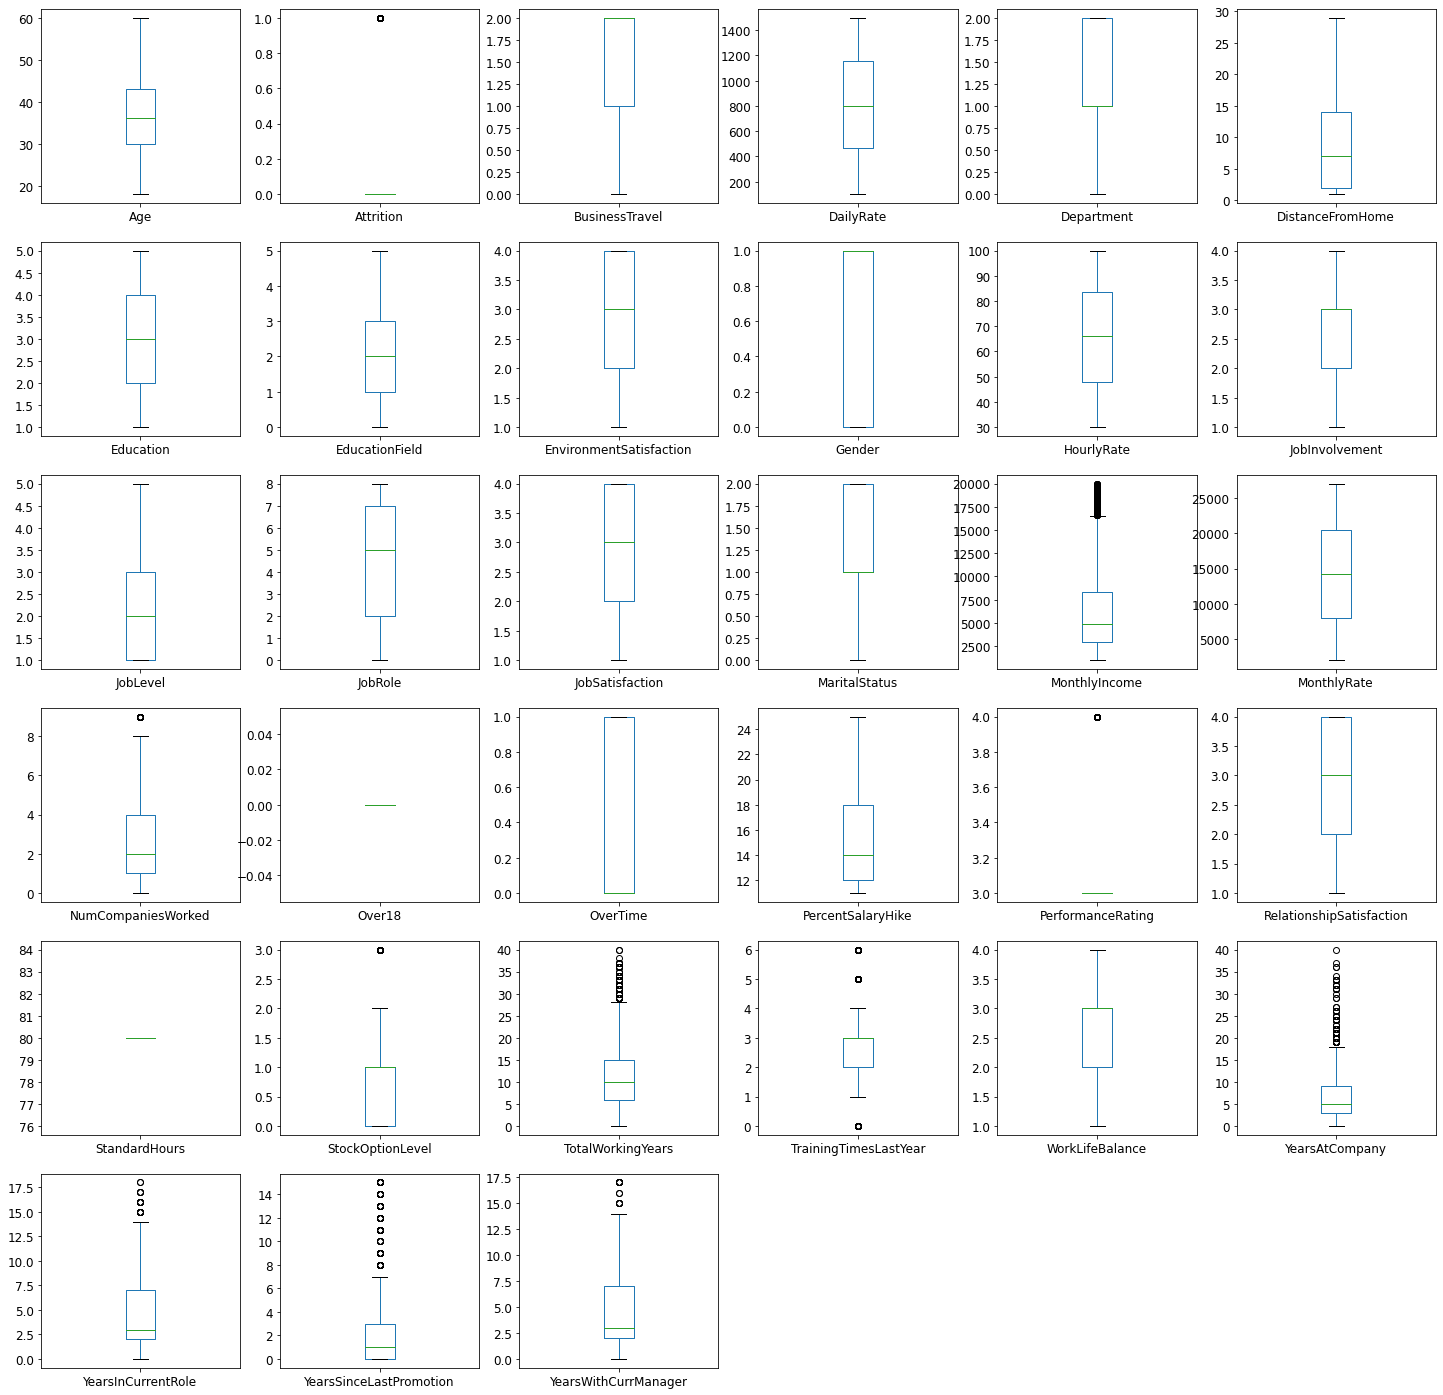

In [40]:
Hr_data.plot(kind='box', subplots=True, layout=(6,6), figsize=(25,25), fontsize=12)

insights:-

there are outliers present in these columns:

attrition,

Monthly income,

Num companies worked,

perforamace rating,

stock option level,

Total working years,

training times last year,

years at company,

years in current role,

years since last promotion,

years with curr manager


# Checking for skewness

In [41]:
Skew=Hr_data.skew()
Skew

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
T

In [42]:
Skew.sort_values(ascending=False)

YearsSinceLastPromotion     1.984290
PerformanceRating           1.921883
Attrition                   1.844366
YearsAtCompany              1.764529
MonthlyIncome               1.369817
TotalWorkingYears           1.117172
NumCompaniesWorked          1.026471
JobLevel                    1.025401
StockOptionLevel            0.968980
OverTime                    0.964489
DistanceFromHome            0.958118
YearsInCurrentRole          0.917363
YearsWithCurrManager        0.833451
PercentSalaryHike           0.821128
TrainingTimesLastYear       0.553124
EducationField              0.550371
Age                         0.413286
Department                  0.172231
MonthlyRate                 0.018578
Over18                      0.000000
StandardHours               0.000000
DailyRate                  -0.003519
HourlyRate                 -0.032311
MaritalStatus              -0.152175
Education                  -0.289681
RelationshipSatisfaction   -0.302828
EnvironmentSatisfaction    -0.321654
J

Observation:
skewness is present in the following column:
YearsSinceLastPromotion     
PerformanceRating           
Attrition                   
YearsAtCompany              
MonthlyIncome               
TotalWorkingYears          
NumCompaniesWorked         
JobLevel                    
StockOptionLevel            
OverTime                    
DistanceFromHome           
YearsInCurrentRole          
YearsWithCurrManager        
PercentSalaryHike           
TrainingTimesLastYear
EducationField  
WorkLifeBalance
BusinessTravel

# Distribution plots

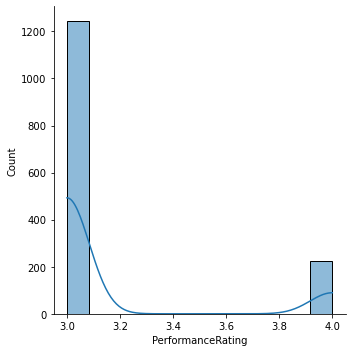

In [43]:
sns.displot(Hr_data['PerformanceRating'], kde= True)

The Data is skewed in this column.

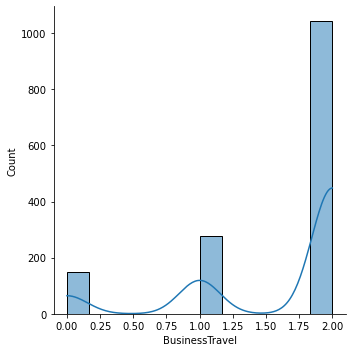

In [44]:
sns.displot(Hr_data['BusinessTravel'], kde= True)

this is categorical value so data is skewed.

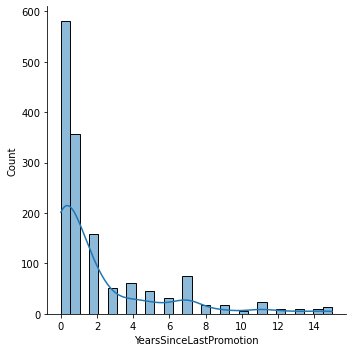

In [45]:
sns.displot(Hr_data['YearsSinceLastPromotion'], kde=True)

Data is Right Skewed in this column.

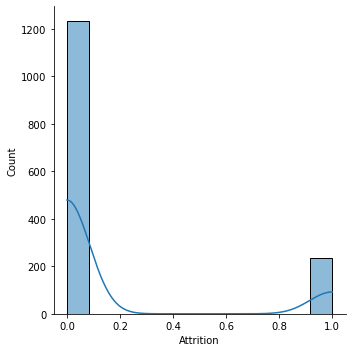

In [46]:
sns.displot(Hr_data['Attrition'], kde=True)

Data is skewed in this column.

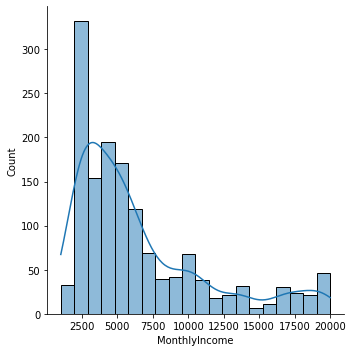

In [47]:
sns.displot(Hr_data['MonthlyIncome'] , kde= True)

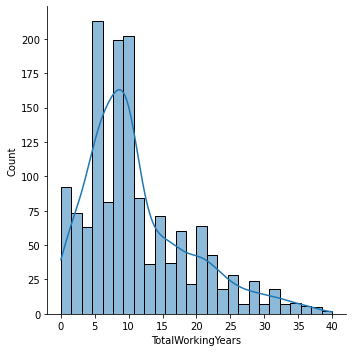

In [48]:
sns.displot(Hr_data['TotalWorkingYears'], kde= True)

the date is skewed and not normally distributed.

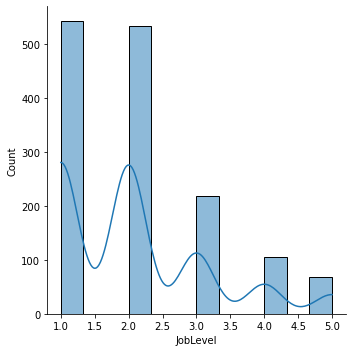

In [49]:
sns.displot(Hr_data['JobLevel'], kde=True)

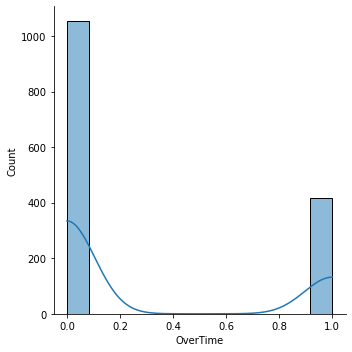

In [50]:
sns.displot(Hr_data['OverTime'], kde=True)

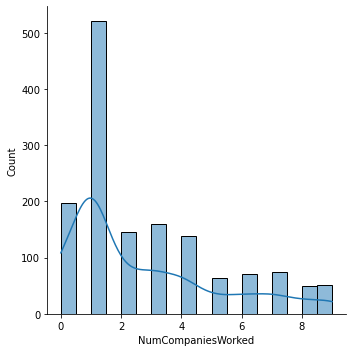

In [51]:
sns.displot(Hr_data['NumCompaniesWorked'], kde=True)

# Data Cleaning

# As there are some of the column which and not contributing towads the label so we will drop it.

In [52]:
Hr_data.drop(columns=["Over18","StandardHours"], inplace=True)

In [53]:
Hr_data.shape

(1470, 31)

There are some of the column which are categorical or showing some negative or little correlation with output, so these will be dropped.

In [54]:
Hr_data.drop(columns=["YearsSinceLastPromotion","RelationshipSatisfaction","PerformanceRating","PercentSalaryHike",
                          "NumCompaniesWorked","MonthlyRate","HourlyRate","Gender","EducationField", "Education"], inplace=True)

In [55]:
Hr_data.shape

(1470, 21)

In [56]:
Hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2,3,2,7.0,4,2.0,5993,1.0,0,8,0,1,6,4,5
1,49,0.0,1.0,279,1.0,8,3,2,2,6.0,2,1.0,5130,0.0,1,10,3,3,10,7,7
2,37,1.0,2.0,1373,1.0,2,4,2,1,2.0,3,2.0,2090,1.0,0,7,3,3,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,3,1,6.0,3,1.0,2909,1.0,0,8,3,3,8,7,0
4,27,0.0,2.0,591,1.0,2,1,3,1,2.0,2,1.0,3468,0.0,1,6,3,3,2,2,2


# Outlier Treatment 

In [57]:
# importing zscore

from scipy.stats import zscore
z= np.abs(zscore(Hr_data))

In [58]:
threshold=3
print(np.where(z>3))

(array([  28,   62,   63,   85,   98,   98,  123,  123,  126,  126,  153,
        187,  187,  190,  190,  231,  231,  237,  270,  270,  281,  386,
        401,  411,  425,  445,  466,  473,  477,  561,  561,  592,  595,
        595,  616,  624,  635,  653,  677,  686,  716,  746,  749,  861,
        875,  894,  914,  918,  926,  956,  962,  976, 1024, 1043, 1078,
       1086, 1111, 1116, 1116, 1135, 1138, 1184, 1301, 1327, 1348, 1351,
       1401, 1430]), array([20, 18, 19, 15, 15, 18, 19, 20, 15, 18, 20, 15, 20, 18, 19, 19, 20,
       18, 15, 18, 19, 20, 15, 18, 18, 15, 19, 18, 18, 18, 20, 18, 15, 18,
       20, 15, 20, 18, 18, 20, 19, 19, 18, 18, 20, 15, 18, 18, 20, 15, 18,
       19, 19, 15, 20, 18, 18, 15, 18, 18, 18, 15, 15, 19, 20, 19, 15, 19]))


In [59]:
Hr_data_new= Hr_data[(z<3).all(axis=1)]

In [60]:
Hr_data_new.shape

(1412, 21)

In [61]:
Hr_data.shape

(1470, 21)

In [62]:
percent_of_dataloss= ((1470-1412)/1470)*100
percent_of_dataloss
# the percent of data loss is less than 5% so we can drop the date and use the new dataframe

3.9455782312925165

In [63]:
Hr_data_new.shape

(1412, 21)

In [64]:
Hr_data=Hr_data_new

In [65]:
Hr_data.shape

(1412, 21)

# Skewness Removal

In [66]:
# splitting the data into two varriable as x,y
x= Hr_data.drop('Attrition', axis=1)
y = Hr_data['Attrition']

In [67]:
print(x.shape)
print(y.shape)

(1412, 20)
(1412,)


In [68]:
x.skew()

Age                        0.449721
BusinessTravel            -1.422121
DailyRate                 -0.020661
Department                 0.183220
DistanceFromHome           0.959593
EnvironmentSatisfaction   -0.327542
JobInvolvement            -0.492319
JobLevel                   1.098427
JobRole                   -0.379654
JobSatisfaction           -0.341911
MaritalStatus             -0.156517
MonthlyIncome              1.494853
OverTime                   0.962926
StockOptionLevel           0.962487
TotalWorkingYears          0.980264
TrainingTimesLastYear      0.570202
WorkLifeBalance           -0.551079
YearsAtCompany             1.292889
YearsInCurrentRole         0.767746
YearsWithCurrManager       0.688839
dtype: float64

In [69]:
# for skewness we will use Power transfomation method 
from sklearn.preprocessing import power_transform
x_new= power_transform(x)
x_new

array([[ 0.59111652,  0.64051768,  0.74661102, ...,  0.19884238,
         0.26067952,  0.55670592],
       [ 1.35790021, -1.37668637, -1.35006026, ...,  0.88553646,
         0.96441072,  0.99170345],
       [ 0.16250637,  0.64051768,  1.33546675, ..., -2.17147157,
        -1.5791246 , -1.53543943],
       ...,
       [-1.09516359,  0.64051768, -1.75994966, ...,  0.19884238,
        -0.4106152 , -0.00429267],
       [ 1.35790021, -1.37668637,  0.56866755, ...,  0.73582031,
         0.75544025,  1.17928539],
       [-0.18352227,  0.64051768, -0.37908697, ..., -0.27563991,
        -0.04382182, -0.36834215]])

# Appling standard scaller for scalling the data.

In [70]:
# import standard scaller

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()


x= sc.fit_transform(x_new)
x

array([[ 0.59111652,  0.64051768,  0.74661102, ...,  0.19884238,
         0.26067952,  0.55670592],
       [ 1.35790021, -1.37668637, -1.35006026, ...,  0.88553646,
         0.96441072,  0.99170345],
       [ 0.16250637,  0.64051768,  1.33546675, ..., -2.17147157,
        -1.5791246 , -1.53543943],
       ...,
       [-1.09516359,  0.64051768, -1.75994966, ...,  0.19884238,
        -0.4106152 , -0.00429267],
       [ 1.35790021, -1.37668637,  0.56866755, ...,  0.73582031,
         0.75544025,  1.17928539],
       [-0.18352227,  0.64051768, -0.37908697, ..., -0.27563991,
        -0.04382182, -0.36834215]])

In [71]:
x.shape

(1412, 20)

In [72]:
y.shape

(1412,)

# Clearing imbalance using SMOTE

In [73]:
y.value_counts()

0.0    1179
1.0     233
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

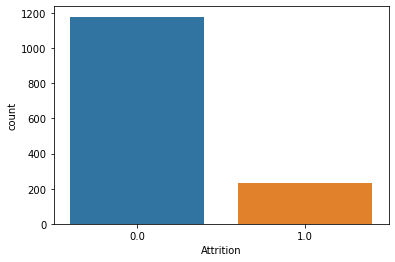

In [74]:
sns.countplot(y)

it is clearly evident that this out in hetrogenious, so we use SOMTE to make it Homoginious.

In [75]:
# calling for SMOTE

from imblearn.over_sampling import SMOTE

sm= SMOTE()

In [76]:
# fitting the data

x,y = sm.fit_resample(x,y)

In [77]:
print(x.shape)
print(y.shape)

(2358, 20)
(2358,)


<AxesSubplot:xlabel='Attrition', ylabel='count'>

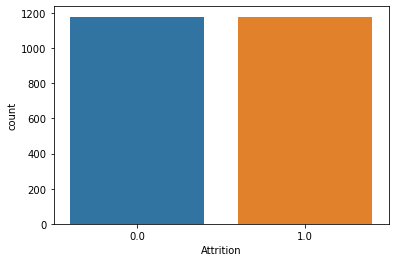

In [78]:
sns.countplot(y)

Now our data has become more evident and will work better.

# Model selection and splitting the data

In [79]:
# calling the models 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


# Checking for the optimum random state.

In [80]:
Maxaccuracy=0
Maxrs=0

for i in range (0,100):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.20, random_state=i)
    lr= LogisticRegression()
    lr.fit(train_x,train_y)
    pred_lr= lr.predict(test_x)
    accuracy= accuracy_score(test_y,pred_lr)
    
    if Maxaccuracy<accuracy:
        Maxaccuracy=accuracy
        Maxrs=i

print('the maximum accuracy to be achived is:', Maxaccuracy,'at the random state' ,Maxrs)

the maximum accuracy to be achived is: 0.8008474576271186 at the random state 31


# the best accuracy 82.41% will be achived at the random state of 29.


 # Checking with different models 

In [83]:
# calling al the required models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

lr= LogisticRegression()
sgd= SGDClassifier()
gnb= GaussianNB()
dtc= DecisionTreeClassifier()
ext= ExtraTreeClassifier()
ada= AdaBoostClassifier()
bac= BaggingClassifier()
rfc=RandomForestClassifier()
svc= SVC()
knn=KNeighborsClassifier()

model = [lr,sgd,gnb,dtc,ext,ada,bac,rfc,svc,knn]

for a in model:
    a.fit(train_x,train_y)
    pred_a=a.predict(test_x)
    print('==========================',a,'===========================')
    print('The accuracy score is', accuracy_score(test_y,pred_a))
    print('the classification report of', a )
    print(classification_report(test_y,pred_a))
    print('the confusion metrix of ', a)
    print(confusion_matrix(test_y,pred_a))
    print('\n')



========================== LogisticRegression() ===========================
The accuracy score is 0.7627118644067796
the classification report of LogisticRegression()
              precision    recall  f1-score   support

         0.0       0.78      0.77      0.77       247
         1.0       0.75      0.76      0.75       225

    accuracy                           0.76       472
   macro avg       0.76      0.76      0.76       472
weighted avg       0.76      0.76      0.76       472

the confusion metrix of  LogisticRegression()
[[189  58]
 [ 54 171]]


========================== SGDClassifier() ===========================
The accuracy score is 0.7436440677966102
the classification report of SGDClassifier()
              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74       247
         1.0       0.71      0.78      0.74       225

    accuracy                           0.74       472
   macro avg       0.75      0.75      0.74       472
weight

## Based on the earlier analysis the Random forest classifier is the best performing model with accuracy of 93.4%.

# Cross validation

In [85]:
# calling Cv score

from sklearn.model_selection import cross_val_score

model= [lr,sgd,gnb,dtc,ext,ada,bac,rfc,svc,knn]

for m in model:
    cross_val= cross_val_score(m,x,y,cv=5)
    print('the cross validation score of ', m ,'is', cross_val.mean())

the cross validation score of  LogisticRegression() is 0.7671731620425348
the cross validation score of  SGDClassifier() is 0.7273165641081003
the cross validation score of  GaussianNB() is 0.7150041383281154
the cross validation score of  DecisionTreeClassifier() is 0.8486190579006081
the cross validation score of  ExtraTreeClassifier() is 0.8367330598438232
the cross validation score of  AdaBoostClassifier() is 0.8770592680557054
the cross validation score of  BaggingClassifier() is 0.9088515239843102
the cross validation score of  RandomForestClassifier() is 0.9347223721616466
the cross validation score of  SVC() is 0.8863390190363093
the cross validation score of  KNeighborsClassifier() is 0.8490211954370434


## As comparing all the CV score it is clearly evident is RandomForestClassifier is best working model with 94% of accuracy and 93% of CV score. To conclude, this will be our fina; model.

# Checking for hyperparameter tunning


In [86]:
# calling for the GridsearchCV

from sklearn.model_selection import GridSearchCV
# creating the parameters

parameter= {
    'max_depth': np.arange(2,10),
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators':np.arange(2,10)
}

In [87]:
GCV= GridSearchCV(RandomForestClassifier(),parameter,cv=5)
# Fit the model

GCV.fit(train_x,train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [88]:
GCV.best_params_

{'max_depth': 9,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 9}

In [91]:
# finding out the accuracy score
pred_GCV= GCV.best_estimator_.predict(test_x)
print(accuracy_score(pred_GCV,test_y))





0.885593220338983


# The final accuracy is 88.55% .

# AUC_ ROC curve

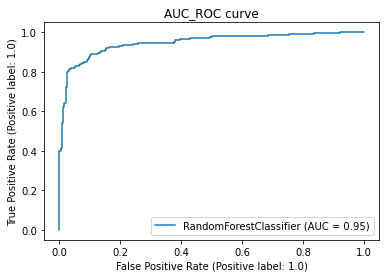

In [92]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_, test_x,test_y)
plt.title('AUC_ROC curve')
plt.show()

# The AUC score is 95% with the acuuracy is 88.55%.

# Saving the best model

In [93]:
import joblib
joblib.dump(GCV.best_estimator_,('HR_Employee_Attribution.pk1'))

['HR_Employee_Attribution.pk1']

In [94]:
import numpy as np 
a= np.array(test_y)
b = np.array(rfc.predict(test_x))

In [96]:
Data= pd.DataFrame({'Original':a, 'predicted':b})
Data

,Original,predicted
0,0.0,0.0
1,0.0,0.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
467,1.0,1.0
468,1.0,1.0
469,0.0,0.0
470,1.0,1.0
